In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

def load_city_data(city, date):
    base_folder = 'C:\\Users\\mvk\\Documents\\DATA_school\\thesis\\data_new'
    base_path = os.path.join(base_folder, city, date)
    listings = pd.read_csv(f"{base_path}/listings.csv")
    calendar = pd.read_csv(f"{base_path}/calendar.csv")
    neighborhoods = pd.read_csv(f"{base_path}/neighbourhoods.csv")
    return listings, calendar, neighborhoods

In [2]:
# Load data for one city/date as example
city = "amsterdam"
date = "2023-06-05"
listings, calendar, neighborhoods = load_city_data(city, date)

# Basic statistics
def basic_stats(listings_df):
    print("Basic Statistics:")
    print(f"Total number of listings: {len(listings_df)}")
    print(f"Average price: ${listings_df['price'].str.replace('$','').str.replace(',','').astype(float).mean():.2f}")
    print(f"Number of unique neighborhoods: {listings_df['neighbourhood_cleansed'].nunique()}")
    print("\nRoom Type Distribution:")
    print(listings_df['room_type'].value_counts())

# Price distribution
def plot_price_distribution(listings_df):
    plt.figure(figsize=(10,6))
    prices = listings_df['price'].str.replace('$','').str.replace(',','').astype(float)
    sns.histplot(data=prices[prices < prices.quantile(0.95)])  # Removing outliers
    plt.title(f'Price Distribution in {city.capitalize()}')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()

# Neighborhood analysis
def neighborhood_analysis(listings_df):
    neighborhood_stats = listings_df.groupby('neighbourhood_cleansed').agg({
        'id': 'count',
        'price': lambda x: x.str.replace('$','').str.replace(',','').astype(float).mean(),
        'review_scores_rating': 'mean'
    }).round(2)
    
    neighborhood_stats.columns = ['Number of Listings', 'Average Price', 'Average Rating']
    return neighborhood_stats.sort_values('Number of Listings', ascending=False)

In [3]:
def analyze_temporal_patterns(calendar_df):
    calendar_df['date'] = pd.to_datetime(calendar_df['date'])
    calendar_df['price'] = calendar_df['price'].str.replace('$','').str.replace(',','').astype(float)
    
    # Average price by day of week
    calendar_df['day_of_week'] = calendar_df['date'].dt.day_name()
    daily_prices = calendar_df.groupby('day_of_week')['price'].mean()
    
    # Availability patterns
    calendar_df['is_available'] = calendar_df['available'].map({'t': 1, 'f': 0})
    availability = calendar_df.groupby('date')['is_available'].mean()
    
    return daily_prices, availability

In [4]:
def compare_cities(cities, date):
    city_stats = {}
    for city in cities:
        listings, _, _ = load_city_data(city, date)
        city_stats[city] = {
            'avg_price': listings['price'].str.replace('$','').str.replace(',','').astype(float).mean(),
            'num_listings': len(listings),
            'avg_rating': listings['review_scores_rating'].mean()
        }
    return pd.DataFrame(city_stats).T

In [5]:
# Define the dates for each city
city_dates = {
    'amsterdam': ['2023-06-05', '2023-09-03', '2023-12-12', '2024-03-11', '2024-06-10', '2024-09-05'],
    'barcelona': ['2023-06-10', '2023-09-06', '2023-12-13', '2024-03-20', '2024-06-15', '2024-09-06'],
    'berlin': ['2023-06-22', '2023-09-16', '2023-12-18', '2024-03-24', '2024-06-22', None],  # Berlin has only 5 dates
    'london': ['2023-06-08', '2023-09-06', '2023-12-10', '2024-03-19', '2024-06-14', '2024-09-06'],
    'paris': ['2023-06-06', '2023-09-04', '2023-12-12', '2024-03-16', '2024-06-10', '2024-09-06'],
    'rome': ['2023-06-10', '2023-09-07', '2023-12-15', '2024-03-22', '2024-06-15', '2024-09-11']
}

# Create DataFrame
df_dates = pd.DataFrame.from_dict(city_dates, orient='index')
df_dates.columns = [f'Scrape_{i+1}' for i in range(len(df_dates.columns))]

print(df_dates)

             Scrape_1    Scrape_2    Scrape_3    Scrape_4    Scrape_5  \
amsterdam  2023-06-05  2023-09-03  2023-12-12  2024-03-11  2024-06-10   
barcelona  2023-06-10  2023-09-06  2023-12-13  2024-03-20  2024-06-15   
berlin     2023-06-22  2023-09-16  2023-12-18  2024-03-24  2024-06-22   
london     2023-06-08  2023-09-06  2023-12-10  2024-03-19  2024-06-14   
paris      2023-06-06  2023-09-04  2023-12-12  2024-03-16  2024-06-10   
rome       2023-06-10  2023-09-07  2023-12-15  2024-03-22  2024-06-15   

             Scrape_6  
amsterdam  2024-09-05  
barcelona  2024-09-06  
berlin           None  
london     2024-09-06  
paris      2024-09-06  
rome       2024-09-11  


=== Analysis of Most Recent Data for Each City ===


AMSTERDAM - Data from 2024-09-05
--------------------------------------------------
Basic Statistics:
Total number of listings: 9659
Average price: $289.64
Number of unique neighborhoods: 22

Room Type Distribution:
room_type
Entire home/apt    7776
Private room       1789
Hotel room           56
Shared room          38
Name: count, dtype: int64


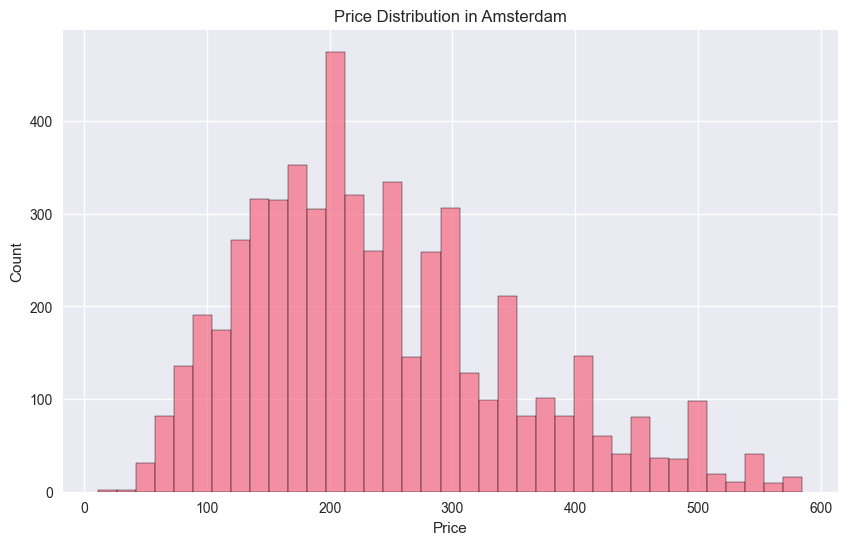


Top 5 Neighborhoods by Number of Listings:
                         Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                    
De Baarsjes - Oud-West                 1655         282.50            4.86
De Pijp - Rivierenbuurt                1102         435.56            4.85
Centrum-West                           1084         319.30            4.81
Centrum-Oost                            855         302.49            4.81
Zuid                                    671         300.79            4.87


BARCELONA - Data from 2024-09-06
--------------------------------------------------


C:\Users\mvk\AppData\Local\Temp\ipykernel_20332\98346064.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv(f"{base_path}/calendar.csv")


Basic Statistics:
Total number of listings: 19482
Average price: $168.63
Number of unique neighborhoods: 71

Room Type Distribution:
room_type
Entire home/apt    11589
Private room        7615
Shared room          160
Hotel room           118
Name: count, dtype: int64


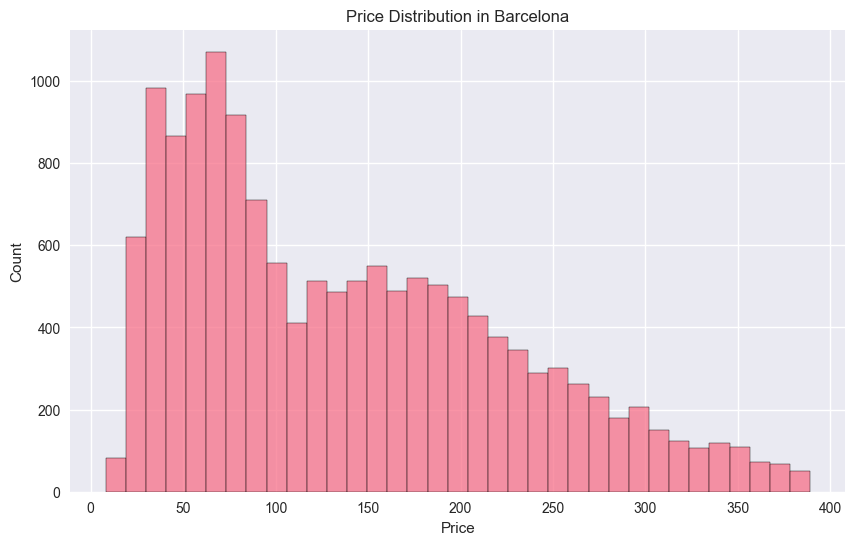


Top 5 Neighborhoods by Number of Listings:
                                       Number of Listings  Average Price  \
neighbourhood_cleansed                                                     
la Dreta de l'Eixample                               2359         231.60   
el Raval                                             1566         125.11   
el Barri Gòtic                                       1265         166.40   
Sant Pere, Santa Caterina i la Ribera                1219         132.63   
la Sagrada Família                                   1136         188.92   

                                       Average Rating  
neighbourhood_cleansed                                 
la Dreta de l'Eixample                           4.64  
el Raval                                         4.51  
el Barri Gòtic                                   4.56  
Sant Pere, Santa Caterina i la Ribera            4.58  
la Sagrada Família                               4.61  


BERLIN - Data from 2024-06-22

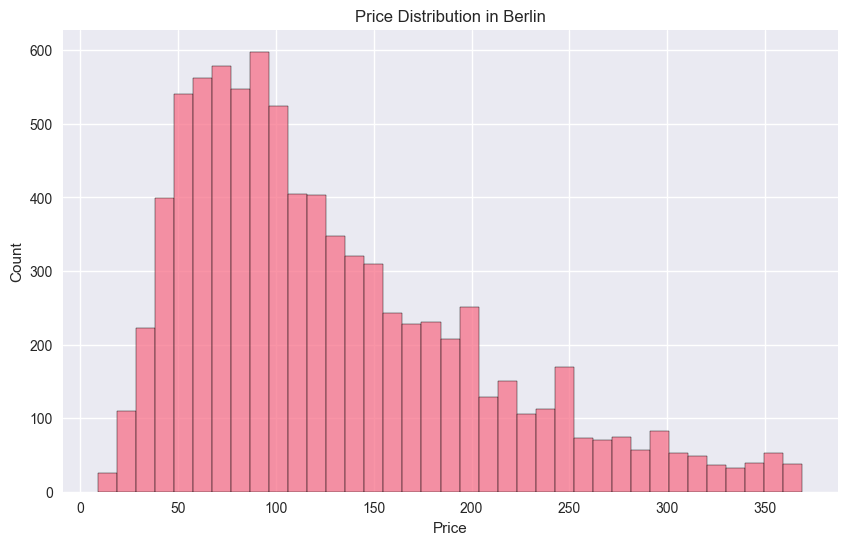


Top 5 Neighborhoods by Number of Listings:
                          Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                     
Alexanderplatz                           879         249.90            4.71
Frankfurter Allee Süd FK                 785         158.34            4.80
Tempelhofer Vorstadt                     656         137.14            4.76
Brunnenstr. Süd                          538         216.05            4.80
Reuterstraße                             459         126.66            4.79


LONDON - Data from 2024-09-06
--------------------------------------------------


C:\Users\mvk\AppData\Local\Temp\ipykernel_20332\98346064.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv(f"{base_path}/calendar.csv")


Basic Statistics:
Total number of listings: 96182
Average price: $197.15
Number of unique neighborhoods: 33

Room Type Distribution:
room_type
Entire home/apt    61321
Private room       34236
Shared room          437
Hotel room           188
Name: count, dtype: int64


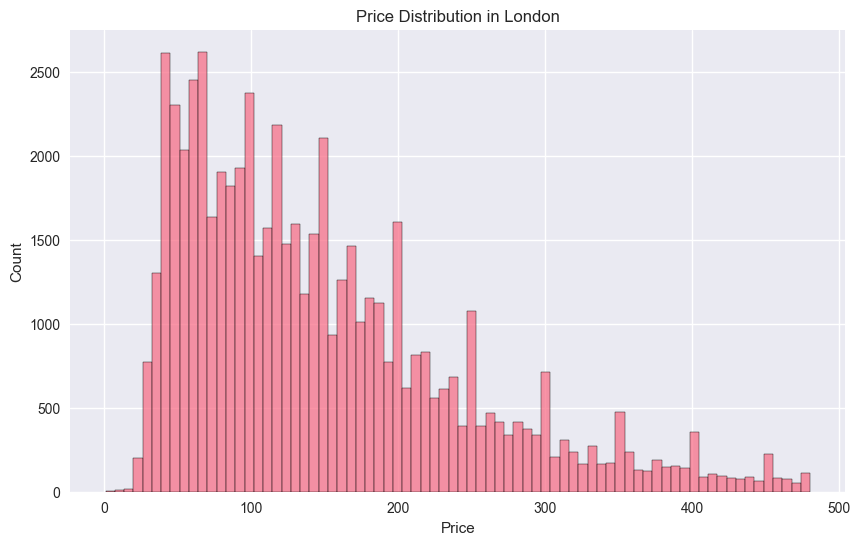


Top 5 Neighborhoods by Number of Listings:
                        Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                   
Westminster                          10713         315.28            4.61
Tower Hamlets                         7697         153.95            4.64
Hackney                               6427         155.58            4.77
Kensington and Chelsea                6417         324.94            4.66
Camden                                6377         215.06            4.63


PARIS - Data from 2024-09-06
--------------------------------------------------


C:\Users\mvk\AppData\Local\Temp\ipykernel_20332\98346064.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv(f"{base_path}/calendar.csv")


Basic Statistics:
Total number of listings: 95461
Average price: $256.02
Number of unique neighborhoods: 20

Room Type Distribution:
room_type
Entire home/apt    85268
Private room        9055
Hotel room           752
Shared room          386
Name: count, dtype: int64


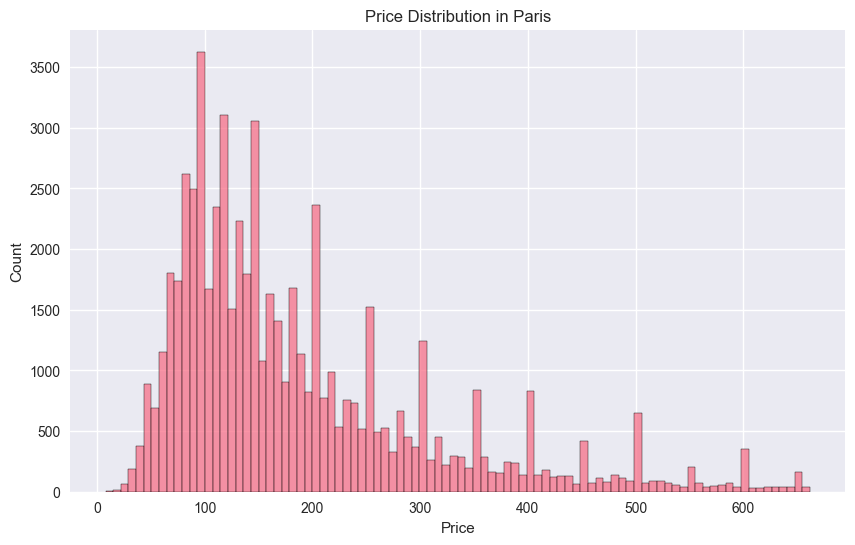


Top 5 Neighborhoods by Number of Listings:
                        Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                   
Buttes-Montmartre                    10532         179.00            4.74
Popincourt                            8392         210.76            4.74
Vaugirard                             7727         245.56            4.71
Batignolles-Monceau                   6673         265.82            4.70
Entrepôt                              6464         217.84            4.73


ROME - Data from 2024-09-11
--------------------------------------------------


C:\Users\mvk\AppData\Local\Temp\ipykernel_20332\98346064.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv(f"{base_path}/calendar.csv")


Basic Statistics:
Total number of listings: 34061
Average price: $213.21
Number of unique neighborhoods: 15

Room Type Distribution:
room_type
Entire home/apt    24912
Private room        8496
Hotel room           497
Shared room          156
Name: count, dtype: int64


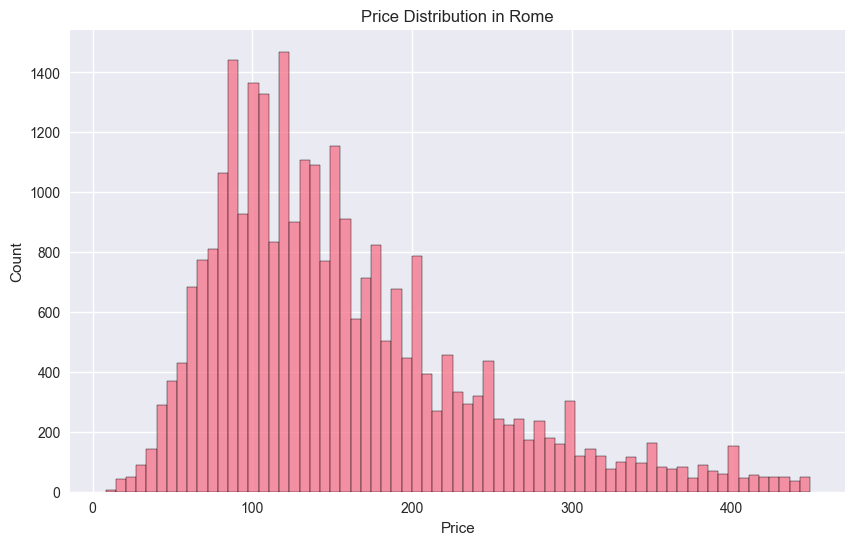


Top 5 Neighborhoods by Number of Listings:
                            Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                       
I Centro Storico                         17192         259.52            4.73
VII San Giovanni/Cinecittà                2748         179.33            4.77
II Parioli/Nomentano                      2448         160.48            4.73
XIII Aurelia                              2205         192.97            4.78
XII Monte Verde                           1798         170.31            4.76


=== Price Trend Analysis for Amsterdam ===



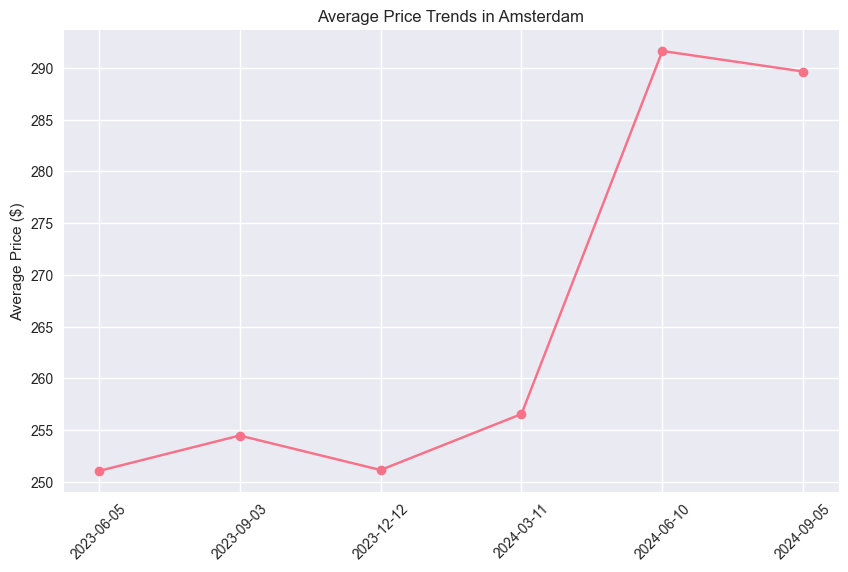

In [6]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create dates dataframe
df_dates = pd.DataFrame({
    'amsterdam': ['2023-06-05', '2023-09-03', '2023-12-12', '2024-03-11', '2024-06-10', '2024-09-05'],
    'barcelona': ['2023-06-10', '2023-09-06', '2023-12-13', '2024-03-20', '2024-06-15', '2024-09-06'],
    'berlin': ['2023-06-22', '2023-09-16', '2023-12-18', '2024-03-24', '2024-06-22', None],
    'london': ['2023-06-08', '2023-09-06', '2023-12-10', '2024-03-19', '2024-06-14', '2024-09-06'],
    'paris': ['2023-06-06', '2023-09-04', '2023-12-12', '2024-03-16', '2024-06-10', '2024-09-06'],
    'rome': ['2023-06-10', '2023-09-07', '2023-12-15', '2024-03-22', '2024-06-15', '2024-09-11']
}).T

# Compare most recent data for all cities
print("=== Analysis of Most Recent Data for Each City ===\n")
for city in df_dates.index:
    most_recent_date = df_dates.loc[city].dropna().iloc[-1]
    print(f"\n{city.upper()} - Data from {most_recent_date}")
    print("-" * 50)
    
    try:
        # Load data using provided function
        listings, calendar, neighborhoods = load_city_data(city, most_recent_date)
        
        # Run basic statistics
        basic_stats(listings)
        
        # Plot price distribution
        plot_price_distribution(listings)
        
        # Get neighborhood analysis
        print("\nTop 5 Neighborhoods by Number of Listings:")
        print(neighborhood_analysis(listings).head())
        
    except Exception as e:
        print(f"Error processing {city}: {e}")
    
    print("\n" + "="*50)

# Example of price trend analysis for one city (Amsterdam)
print("\n=== Price Trend Analysis for Amsterdam ===\n")
amsterdam_prices = []

for date in df_dates.loc['amsterdam']:
    try:
        listings, _, _ = load_city_data('amsterdam', date)
        avg_price = listings['price'].str.replace('$','').str.replace(',','').astype(float).mean()
        amsterdam_prices.append({'date': date, 'average_price': avg_price})
    except Exception as e:
        print(f"Error processing date {date}: {e}")

# Plot price trends
prices_df = pd.DataFrame(amsterdam_prices)
plt.figure(figsize=(10,6))
plt.plot(prices_df['date'], prices_df['average_price'], marker='o')
plt.title('Average Price Trends in Amsterdam')
plt.xticks(rotation=45)
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()